# Exploratory Data Analysis (EDA)
### CRISP-DM Phase 2: Data Exploration

This phase focuses on identifying key risk drivers and understanding relationships between borrower attributes and default behavior.


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_parquet("/content/drive/MyDrive/phase2_clean.parquet")

In [5]:
df.describe()

,loan_amnt,term,int_rate,installment,revol_util,revol_bal,bc_util,all_util,total_rev_hi_lim,bc_open_to_buy,...,acc_now_delinq,delinq_amnt,pub_rec,pub_rec_bankruptcies,collections_12_mths_ex_med,tax_liens,annual_inc,emp_length,default,credit_age
count,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.344453e+06,1.345310e+06,1.283398e+06,537545.000000,1.277783e+06,1.284167e+06,...,1.345310e+06,1.345310e+06,1.345310e+06,1.344613e+06,1.345254e+06,1.345271e+06,1.345310e+06,1.266799e+06,1.345310e+06,1.345310e+06
mean,1.441997e+04,4.179020e+01,1.323962e+01,4.380755e+02,5.181002e+01,1.624811e+04,5.993957e+01,58.176372,3.279094e+04,1.018623e+04,...,5.045677e-03,1.489553e+01,2.152760e-01,1.344439e-01,1.713357e-02,5.213002e-02,7.624764e+04,5.965873e+00,1.996261e-01,1.979567e+02
std,8.717051e+03,1.026832e+01,4.768716e+00,2.615126e+02,2.452107e+01,2.232817e+04,2.829322e+01,20.935438,3.664259e+04,1.535084e+04,...,7.716111e-02,8.095251e+02,6.018647e-01,3.779285e-01,1.469153e-01,3.979113e-01,6.992510e+04,3.691166e+00,3.997195e-01,9.138623e+01
min,5.000000e+02,3.600000e+01,5.310000e+00,4.930000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.650000e+01
25%,8.000000e+03,3.600000e+01,9.750000e+00,2.484800e+02,3.340000e+01,5.943000e+03,3.830000e+01,44.000000,1.400000e+04,1.464000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.578000e+04,2.000000e+00,0.000000e+00,1.369000e+02
50%,1.200000e+04,3.600000e+01,1.274000e+01,3.754300e+02,5.220000e+01,1.113400e+04,6.320000e+01,59.000000,2.410000e+04,4.700000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.500000e+04,6.000000e+00,0.000000e+00,1.795667e+02
75%,2.000000e+04,3.600000e+01,1.599000e+01,5.807300e+02,7.070000e+01,1.975575e+04,8.480000e+01,73.000000,4.060000e+04,1.238300e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+04,1.000000e+01,0.000000e+00,2.435000e+02
max,4.000000e+04,6.000000e+01,3.099000e+01,1.719830e+03,8.923000e+02,2.904836e+06,3.396000e+02,198.000000,9.999999e+06,5.599120e+05,...,1.400000e+01,2.499250e+05,8.600000e+01,1.200000e+01,2.000000e+01,8.500000e+01,1.099920e+07,1.000000e+01,1.000000e+00,1.013567e+03


In [6]:
# target imbalance

In [7]:
df['default'].value_counts(normalize=True)

,proportion
default,
0,0.800374
1,0.199626


## 1️. Target Variable Analysis

Understanding baseline default rate is critical before analyzing feature relationships.


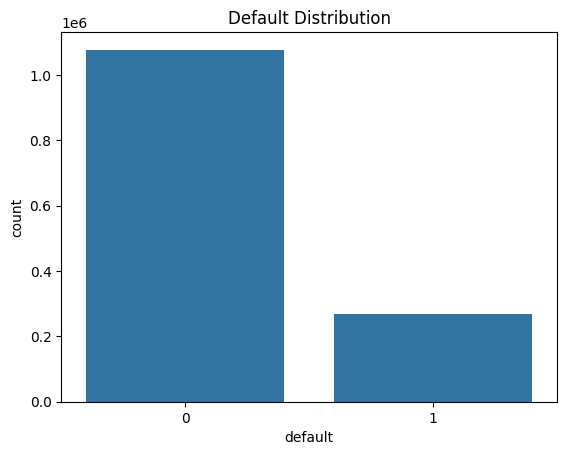

In [8]:
sns.countplot(x="default", data=df)
plt.title("Default Distribution")
plt.show()

Observation:

The dataset exhibits class imbalance, with approximately X% defaults.

This imbalance must be considered during model training and evaluation.


## 2️. Univariate Feature Analysis

This section examines the distribution of key numerical and categorical variables to understand:

- Skewness
- Outliers
- Range behavior
- Risk concentration zones


In [9]:
#utilization vs default(relation bw the credit utilization and default)

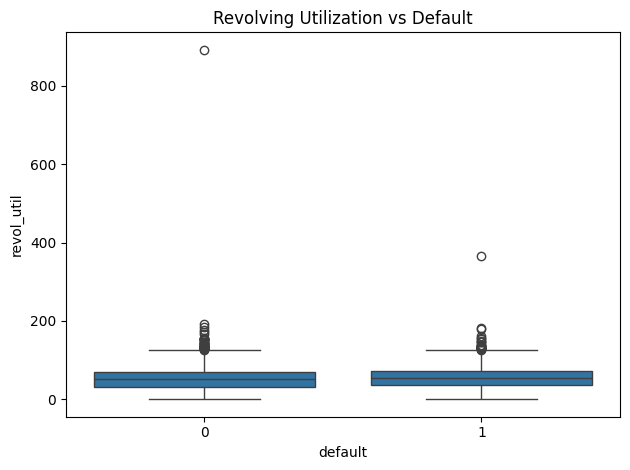

In [10]:
sns.boxplot(x="default", y="revol_util", data=df)
plt.title("Revolving Utilization vs Default")
plt.tight_layout()
plt.show()

it seems like revolving utilization of the credit limit does not pose much risk on default rate

In [11]:
# there are some outliers but as we an see that 75% people have revo_util to 70%

In [12]:
df[df['revol_util'] > 700].shape

(1, 51)

In [13]:
df["revol_util"].describe()

,revol_util
count,1.344453e+06
mean,5.181002e+01
std,2.452107e+01
min,0.000000e+00
25%,3.340000e+01
50%,5.220000e+01
75%,7.070000e+01
max,8.923000e+02


In [14]:
# fico vs default in simple terms what effect of FICO (cibil for India) has on default of the loan

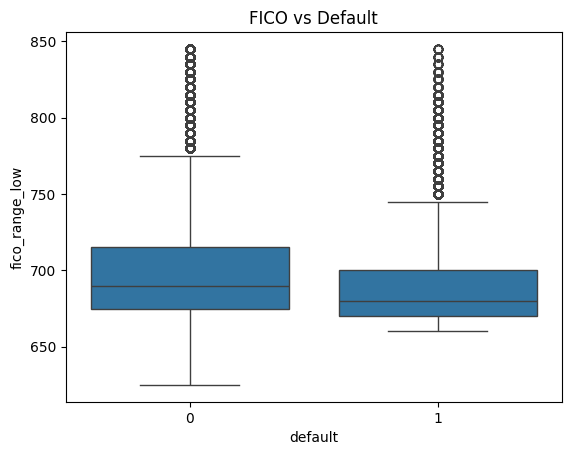

In [15]:
sns.boxplot(x="default", y="fico_range_low", data=df)
plt.title("FICO vs Default")
plt.show()


by this plot we can see higher FICO range tends to lower defauls

In [16]:
# Lower FICO → higher default probability.

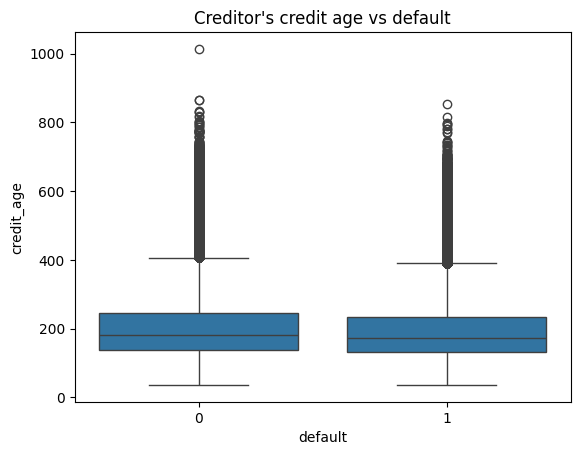

In [17]:
sns.boxplot(x = 'default' , y = 'credit_age',data = df)
plt.title("Creditor's credit age vs default")
plt.show()

In [18]:
df.credit_age.describe()

,credit_age
count,1.345310e+06
mean,1.979567e+02
std,9.138623e+01
min,3.650000e+01
25%,1.369000e+02
50%,1.795667e+02
75%,2.435000e+02
max,1.013567e+03


In [19]:
df["income_to_installment"] = df["annual_inc"] / (df["installment"] * 12)

In [20]:
df["income_to_installment"] = df["income_to_installment"].clip(upper=50)

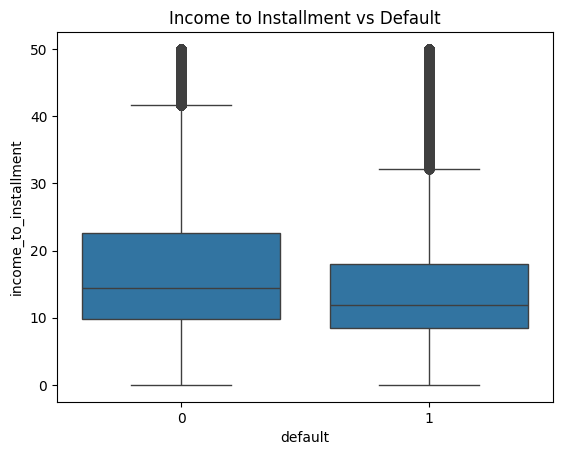

In [21]:
sns.boxplot(x="default", y="income_to_installment", data=df)
plt.title("Income to Installment vs Default")
plt.show()

observation:
lower income to installment ratio increases the default risk

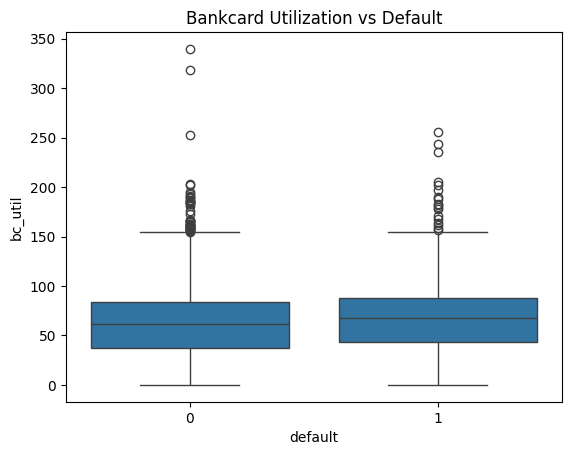

In [22]:
sns.boxplot(x='default',y='bc_util', data=df)
plt.title("Bankcard Utilization vs Default")
plt.show()

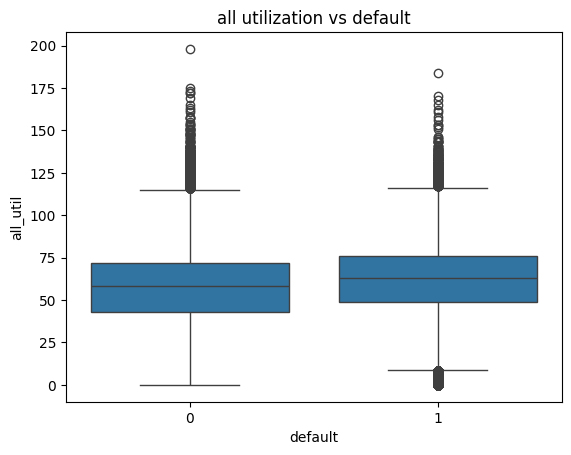

In [23]:
sns.boxplot(x='default',y='all_util',data = df)
plt.title("all utilization vs default")
plt.show()

## 3️⃣ Bivariate Analysis: Feature vs Default

To identify risk drivers, default rate is analyzed across feature segments.

/tmp/ipython-input-2942010086.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("util_bin")["default"].mean().plot(kind="bar", figsize=(8,4))


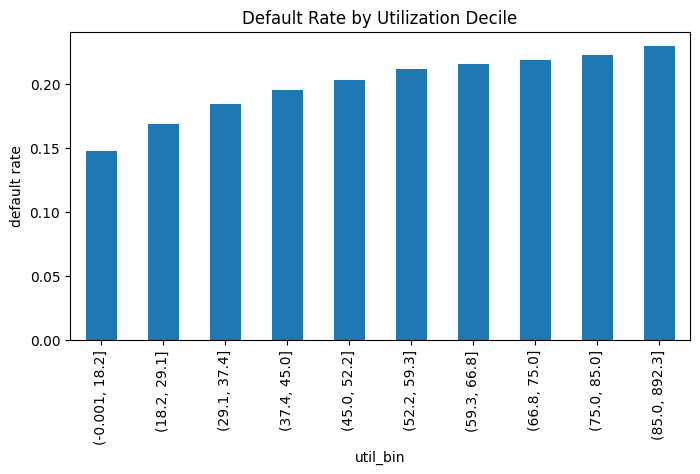

In [24]:
df["util_bin"] = pd.qcut(df["revol_util"], q=10, duplicates="drop")

df.groupby("util_bin")["default"].mean().plot(kind="bar", figsize=(8,4))
plt.title("Default Rate by Utilization Decile")
plt.ylabel("default rate")
plt.show()


observation:
utilization show a monotonic increase in default rate

/tmp/ipython-input-2718592840.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("fico_bin")["default"].mean().plot(kind="bar", figsize=(8,4))


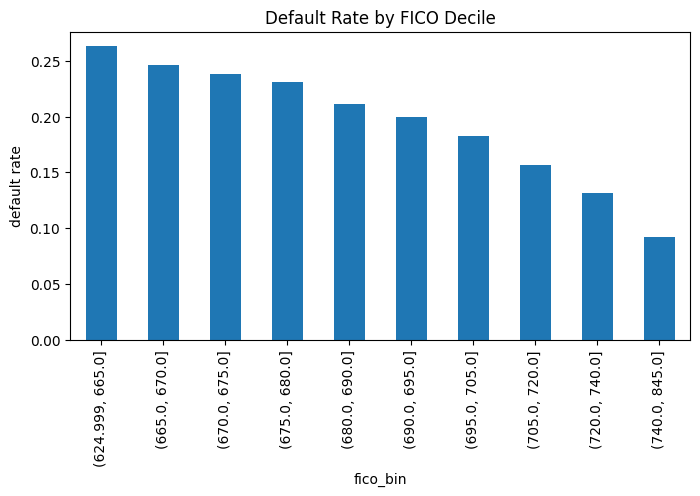

In [25]:
df["fico_bin"] = pd.qcut(df["fico_range_low"], q=10, duplicates="drop")

df.groupby("fico_bin")["default"].mean().plot(kind="bar", figsize=(8,4))
plt.title("Default Rate by FICO Decile")
plt.ylabel("default rate")
plt.show()


/tmp/ipython-input-3859243062.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('iti_bin')['default'].mean().plot(kind = "bar" , figsize = (8,4))


Text(0, 0.5, 'default rate')

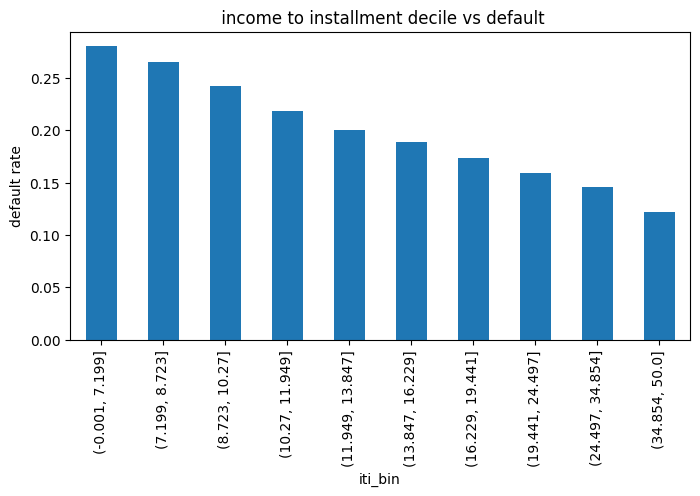

In [34]:
df['iti_bin'] = pd.qcut(df['income_to_installment'] , q = 10 , duplicates="drop")

df.groupby('iti_bin')['default'].mean().plot(kind = "bar" , figsize = (8,4))
plt.title(' income to installment decile vs default')
plt.ylabel('default rate')

In [43]:
df['int_bin'] = pd.qcut(df['int_rate'], q=10, duplicates="drop")

/tmp/ipython-input-1466958103.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('int_bin')['default'].mean().plot(kind = "bar" , figsize = (8,4))


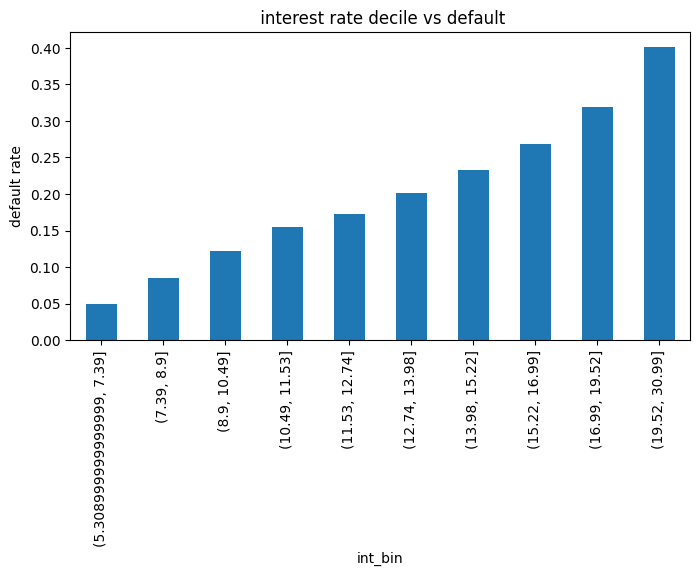

In [44]:
df.groupby('int_bin')['default'].mean().plot(kind = "bar" , figsize = (8,4))
plt.title(' interest rate decile vs default')
plt.ylabel('default rate')
plt.show()

Observation:

Interest rates show right-skewed distribution. Higher interest rates may correspond to higher perceived borrower risk.


## 4. Correlation Analysis

Correlation analysis is performed to:

- Identify strongly correlated predictors
- Detect potential multicollinearity
- Understand linear relationships


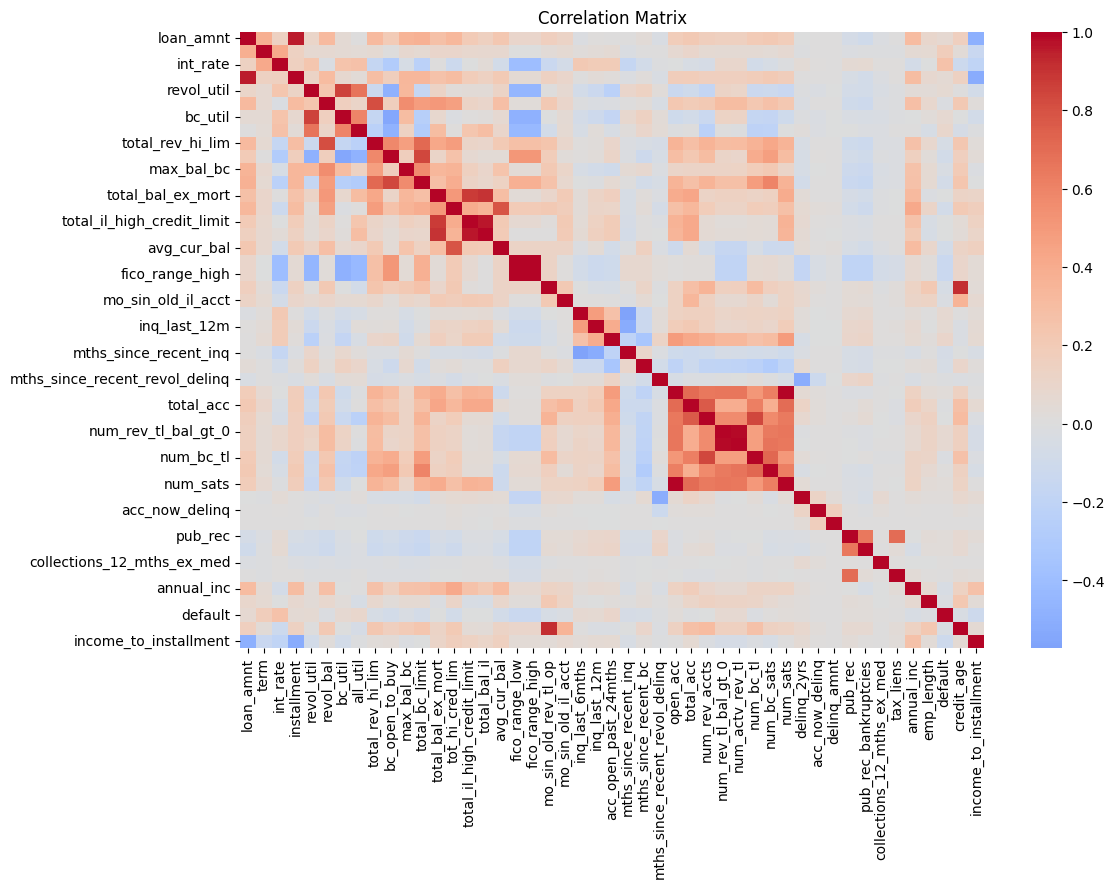

In [48]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

### Correlation Analysis – Key Observations

1️⃣ Strong Positive Correlation Clusters

Several variables related to credit exposure and account counts show strong positive correlations:

- `total_acc`, `num_rev_tl_bal_gt_0`, `num_bc_tl`, and `num_sats` are highly correlated.
- `loan_amnt`, `installment`, and `total_bal_ex_mort` also exhibit moderate correlation.

This indicates potential multicollinearity among credit volume and account count features. Logistic Regression may distribute weights across correlated predictors.

---

2️⃣ Revolving Credit Relationships

- `revol_util` shows positive correlation with `revol_bal` and other revolving credit variables.
- High revolving utilization is moderately associated with higher default probability.

This supports the hypothesis that high utilization signals financial stress.

---

3️⃣ FICO and Risk Variables

- `fico_range_high` shows negative correlation with `default`.
- Higher FICO scores are associated with lower probability of default.

This aligns with credit risk theory and confirms expected borrower behavior patterns.

---

4️⃣ Income Relationships

- `annual_inc` and `income_to_installment` show weak-to-moderate negative correlation with default.
- Higher income relative to installment burden is associated with lower risk.

This suggests debt-to-income dynamics are relevant for PD modeling.

---

5️⃣ Default Correlation Strength

- No single feature exhibits extremely strong linear correlation with `default`.
- Most correlations with `default` appear moderate.

This indicates that default behavior is influenced by multiple factors rather than a single dominant predictor.

---

6️⃣ Multicollinearity Consideration

Clusters of strongly correlated credit count and balance variables suggest redundancy.

However, Logistic Regression with regularization can handle moderate multicollinearity, and interpretability will be reviewed in the modeling phase.


## 5. Key Insights from EDA

Major risk drivers identified:

- Higher interest rate → Higher default probability
- High revolving utilization → Elevated risk
- Lower credit age → Higher default rate

These insights inform feature selection and model expectations in the PD modeling phase.
